# Часть 1. **Исследование эффектов дискретизации**

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import skimage as ski
from scipy.signal import spectrogram, resample
from scipy.fft import fftshift, fft, fftfreq, irfft, rfft, ifft
from skimage import io
from scipy.stats import uniform, norm
from scipy.integrate import quad

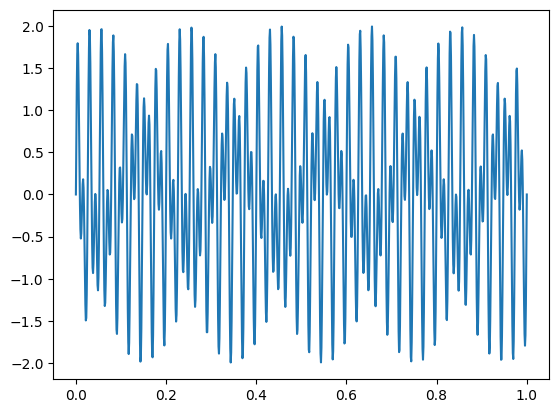

In [ ]:
v1=40
v2=75
def x(t):
  return np.sin(2*np.pi*v1*t)+np.sin(2*np.pi*v2*t)

t=np.linspace(0,1,1000)
plt.plot(t,x(t))

# По теореме Котельникова для точного восстановления непрерывного сигнала частота дискретизации должна удовлетворять условию $f_s > 2*F_{max}$.
# Применительно для нашего случая, где сигнал складывается из двух частот, мы должны выбрать максимальную:
# $f_s > 2*max(v_1,v_2) = 2*v_2 = 150 Гц$

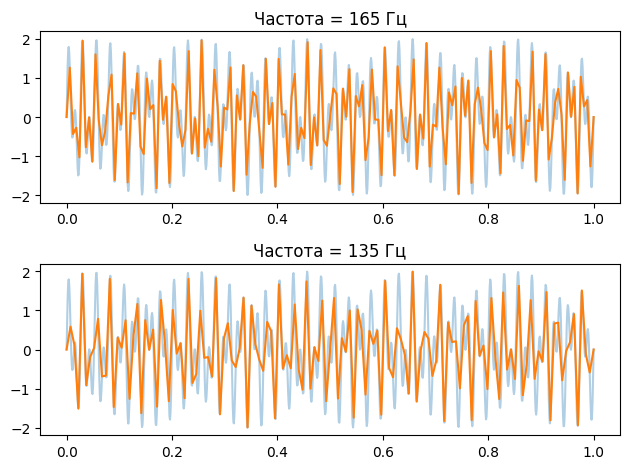

In [ ]:
f_s_1=165
f_s_2=135

t1=np.linspace(0,1,f_s_1)
t2=np.linspace(0,1,f_s_2)

fig, axs =plt.subplots(2,1)

axs[0].plot(t,x(t),alpha=0.35)
axs[0].plot(t1,x(t1))
axs[0].set_title(f'Частота = {f_s_1} Гц')

axs[1].plot(t,x(t),alpha=0.35)
axs[1].plot(t2,x(t2))
axs[1].set_title(f'Частота = {f_s_2} Гц')
fig.tight_layout()

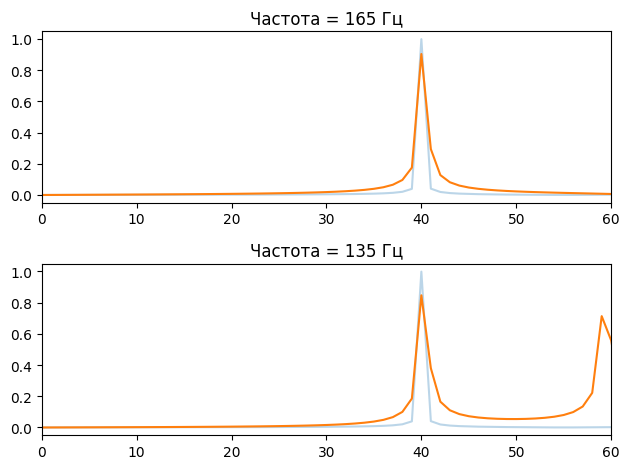

In [ ]:
f_s = 1000

yf = fft(x(t))
xf = fftfreq(f_s, 1/f_s)[:f_s//2]

yf1 = fft(x(t1))
xf1 = fftfreq(f_s_1, 1/f_s_1)[:f_s_1//2]

yf2 = fft(x(t2))
xf2 = fftfreq(f_s_2, 1/f_s_2)[:f_s_2//2]

fig, axs = plt.subplots(2, 1)
axs[0].plot(xf, 2.0/f_s * np.abs(yf[0:f_s//2]), alpha = 0.3)
axs[0].plot(xf1, 2.0/f_s_1 * np.abs(yf1[0:f_s_1//2]))

axs[0].set_title(f'Частота = {f_s_1} Гц')

axs[1].plot(xf, 2.0/f_s * np.abs(yf[0:f_s//2]), alpha = 0.3)
axs[1].plot(xf2, 2.0/f_s_2 * np.abs(yf2[0:f_s_2//2]))

axs[1].set_title(f'Частота = {f_s_2} Гц')


axs[0].axes.set_xlim(0, 60)
axs[1].axes.set_xlim(0, 60)
fig.tight_layout()


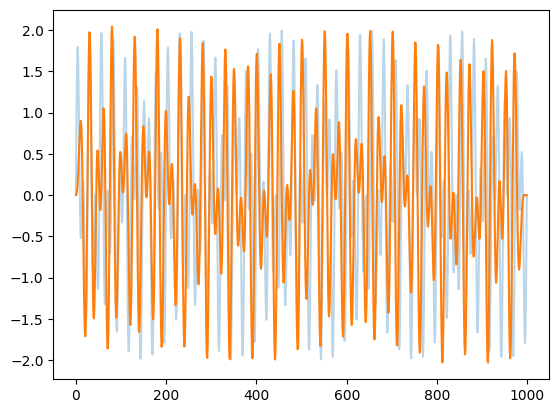

In [ ]:
x_bad = resample(x(t2), 1000)
plt.plot(x(t), alpha = 0.3)
plt.plot(x_bad)

[[0.01176471 0.         0.02745098 ... 0.         0.         0.01176471]
 [0.00392157 0.99215686 0.98823529 ... 0.99215686 1.         0.        ]
 [0.         1.         0.98431373 ... 0.99215686 1.         0.        ]
 ...
 [0.         1.         1.         ... 1.         0.98431373 0.00784314]
 [0.         1.         0.98039216 ... 0.99215686 1.         0.        ]
 [0.01568627 0.         0.01568627 ... 0.00784314 0.         0.01960784]]


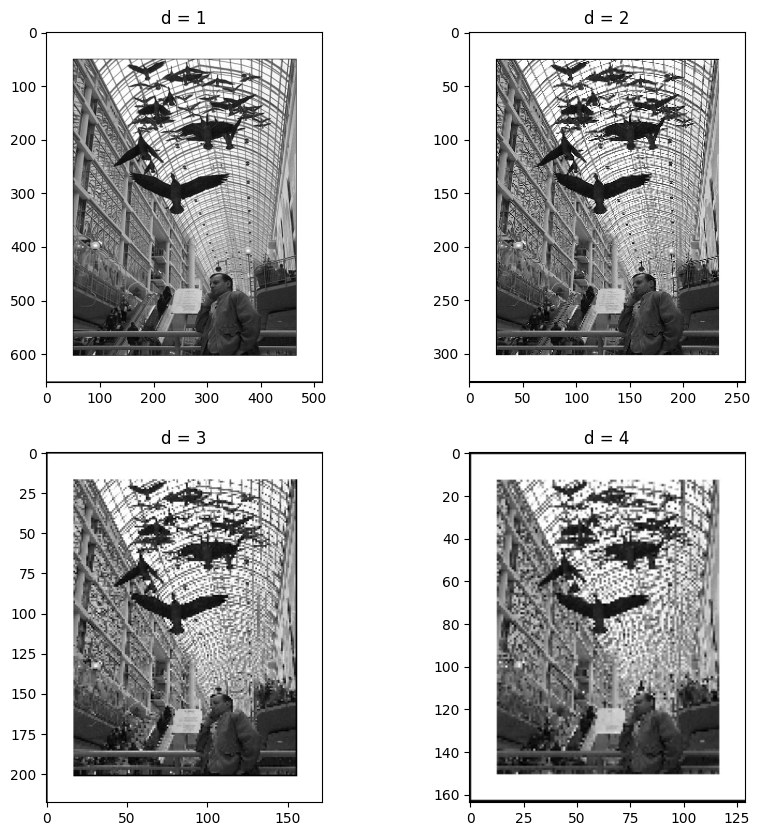

In [ ]:
image = io.imread('var9.png', as_gray=True)
print (image)

images = []

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax = axes.ravel()

for d in [1, 2, 3, 4]:
    images.append(image[::d, ::d])
    ax[d-1].imshow(images[-1], cmap='gray')
    ax[d-1].set_title(f'd = {d}')

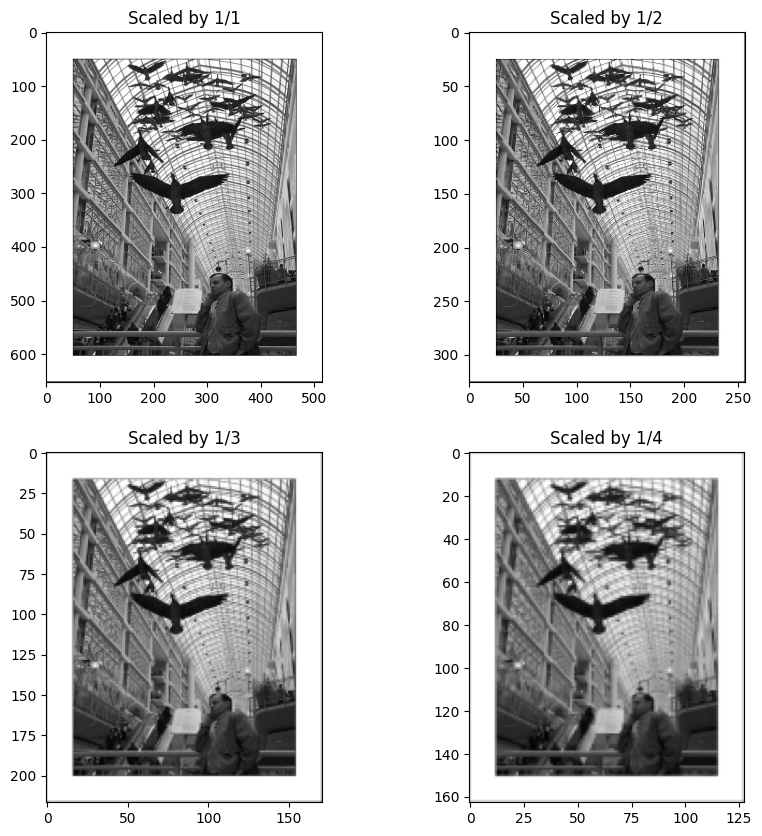

In [ ]:
image = io.imread('var9.png', as_gray=True)
images = []
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax = axes.ravel()

for d in [1, 2, 3, 4]:
    resized_image = ski.transform.resize(image, output_shape=(image.shape[0] // d, image.shape[1] // d), order=3)
    images.append(resized_image)

for i in range(4):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(f'Scaled by 1/{i+1}')

plt.show()


# Часть 2. **Исследование эффектов квантования**

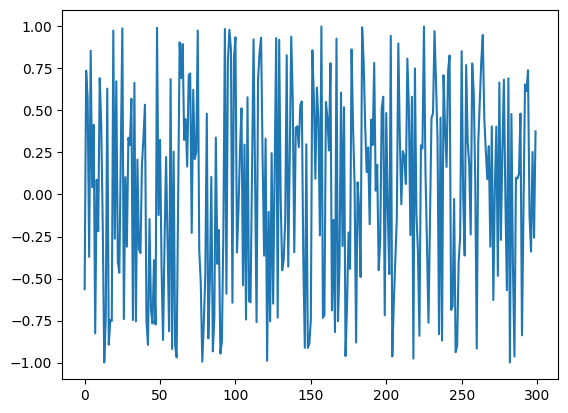

In [ ]:
# Длина сигнала
num_samples = 300
# Генерация случайных значений с равномерным распределением
x = np.random.uniform(low=-1, high=1, size=num_samples)

plt.plot(x)

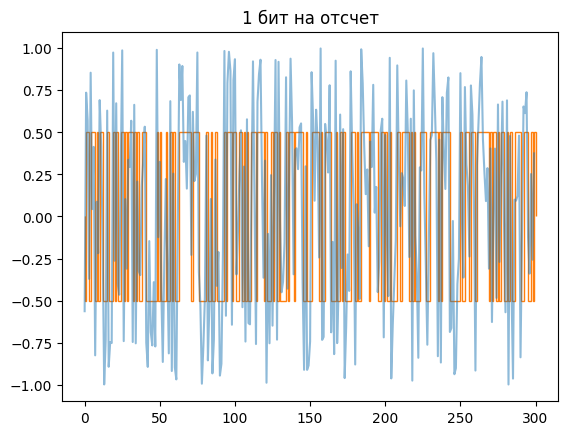

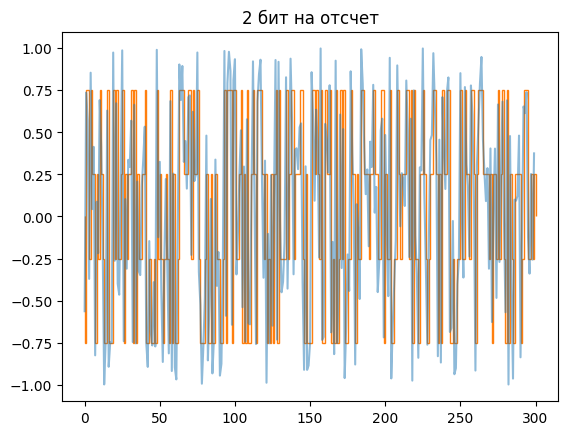

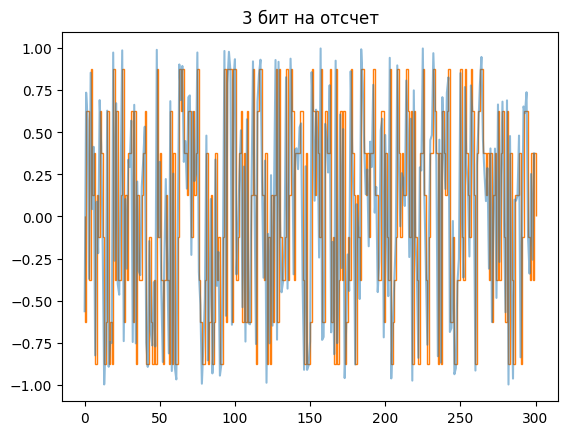

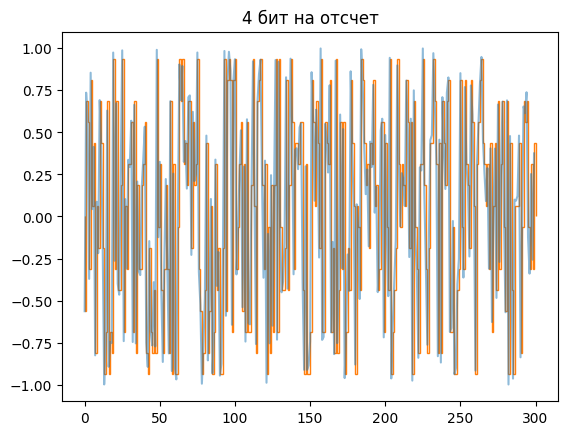

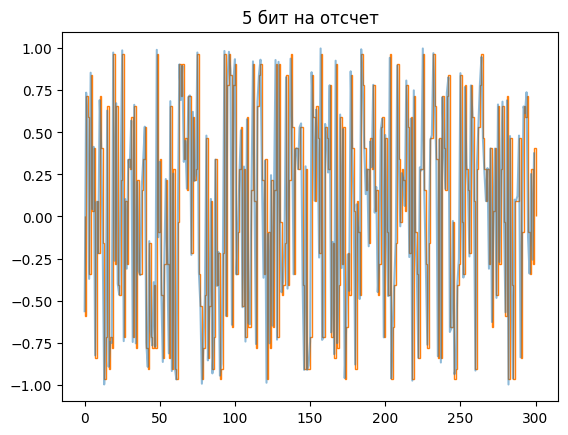

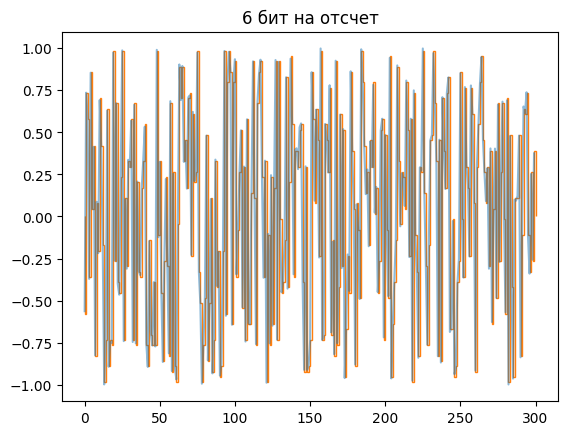

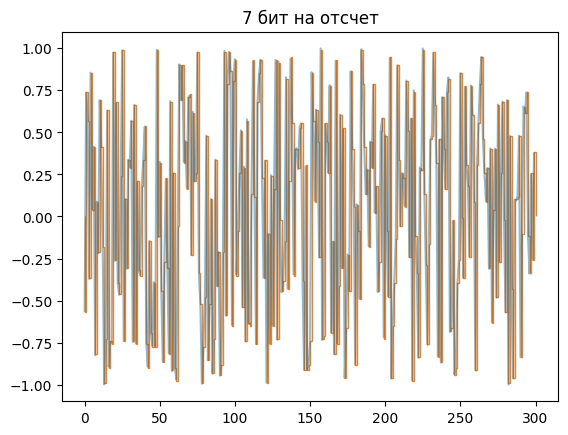

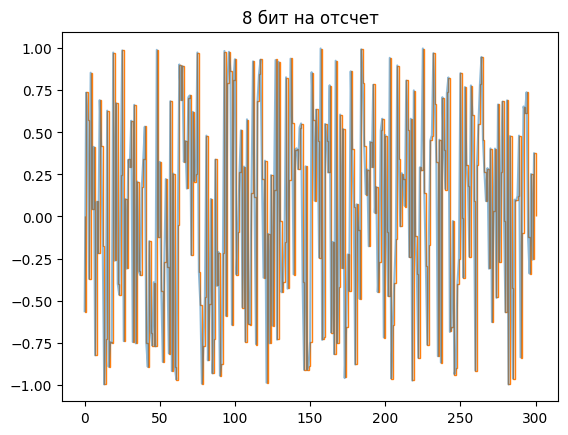

In [ ]:
def discretizator(x_min=-1, x_max=1, quant_level=8):
  q=(x_max-x_min)/(2**quant_level)
  return lambda x: (np.floor(x / q)+1/2)*q
for i in range(8):
  func=discretizator(quant_level=(i+1))
  x_q=func(x)
  plt.figure()
  plt.plot(x,alpha=0.5)
  plt.stairs(x_q)
  plt.title(f"{i+1} бит на отсчет")

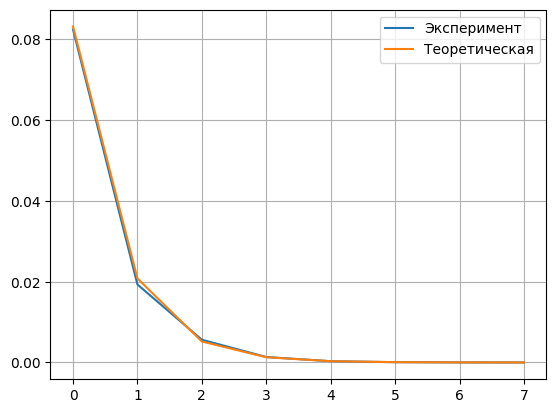

In [ ]:
q_error = []
theor_error = []
for i in range(8):
  q = (max(x)-min(x))/(2**(i+1))
  func = discretizator(quant_level=(i+1))
  x_q = func(x)
  q_error.append(abs(np.mean((x-x_q)**2)))

  theor_error.append(abs((q**2)/12))

plt.plot(q_error, label = "Эксперимент")
plt.plot(theor_error, label = "Теоретическая")
plt.legend()
plt.grid()

Text(0, 0.5, 'SNR, dB')

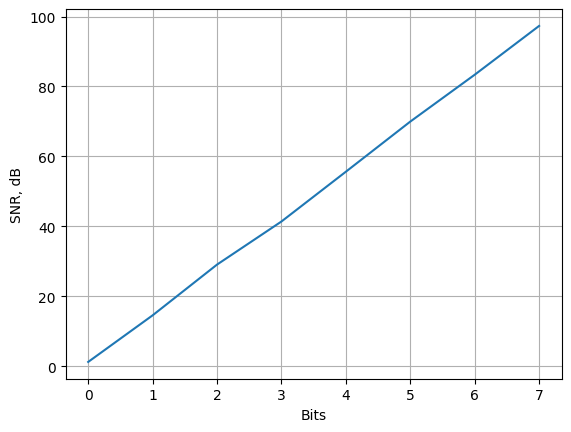

In [ ]:
def A_RMS(a):
  sum=0
  for a_n in a:
    sum+= a_n**2
  return (sum/num_samples)**(1/2)

SNR=[]
for i in range(8):
  func = discretizator(quant_level=i)
  x_q=func(x)
  A_signal=A_RMS(x)
  A_noize=A_RMS(x-x_q)
  SNR.append(20*np.log(A_signal/A_noize))

plt.plot(SNR)
plt.grid()
plt.xlabel('Bits')
plt.ylabel('SNR, dB')

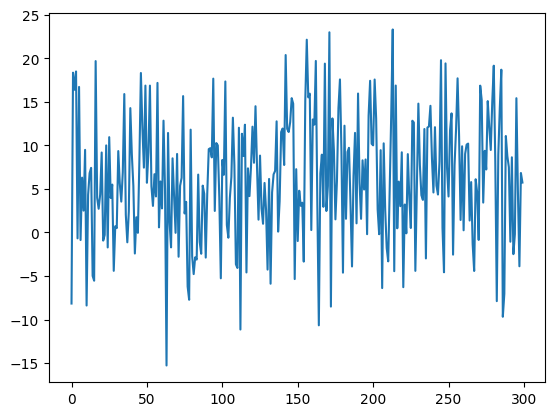

In [ ]:
m=6
sigma = 7
x=np.random.normal(m,sigma,300)
plt.plot(x)

In [ ]:

t = {
    1: np.array([0])*sigma + m,
    2: np.array([-0.9816, 0, 0.9816])*sigma + m,
    3: np.array([-1.7479, -1.0500, -0.5005, 0, 0.5005, 1.0500, 1.7479])*sigma + m,
    4: np.array([-2.4008, -1.8435, -1.4371, -1.0993, -0.7995, -0.5224, -0.2582, 0,
          0.2582, 0.5224, 0.7995, 1.0993, 1.4371, 1.8435, 2.4008])*sigma + m
}
d = {
    1: np.array([-0.7979, 0.7979])*sigma + m,
    2: np.array([-1.5104, -0.4528, 0.4528, 1.5104])*sigma + m,
    3: np.array([-2.1519, -1.3439, -0.7560, -0.2451, 0.2451, 0.7560, 1.3439, 2.1519])*sigma + m,
    4: np.array([-2.7326, -2.0690, -1.6180, -1.2562, -0.9423, -0.6568, -0.3880, -0.1284,
          0.1284, 0.3880, 0.6568, 0.9423, 1.2562, 1.6180, 2.0690, 2.7326])*sigma + m
   }


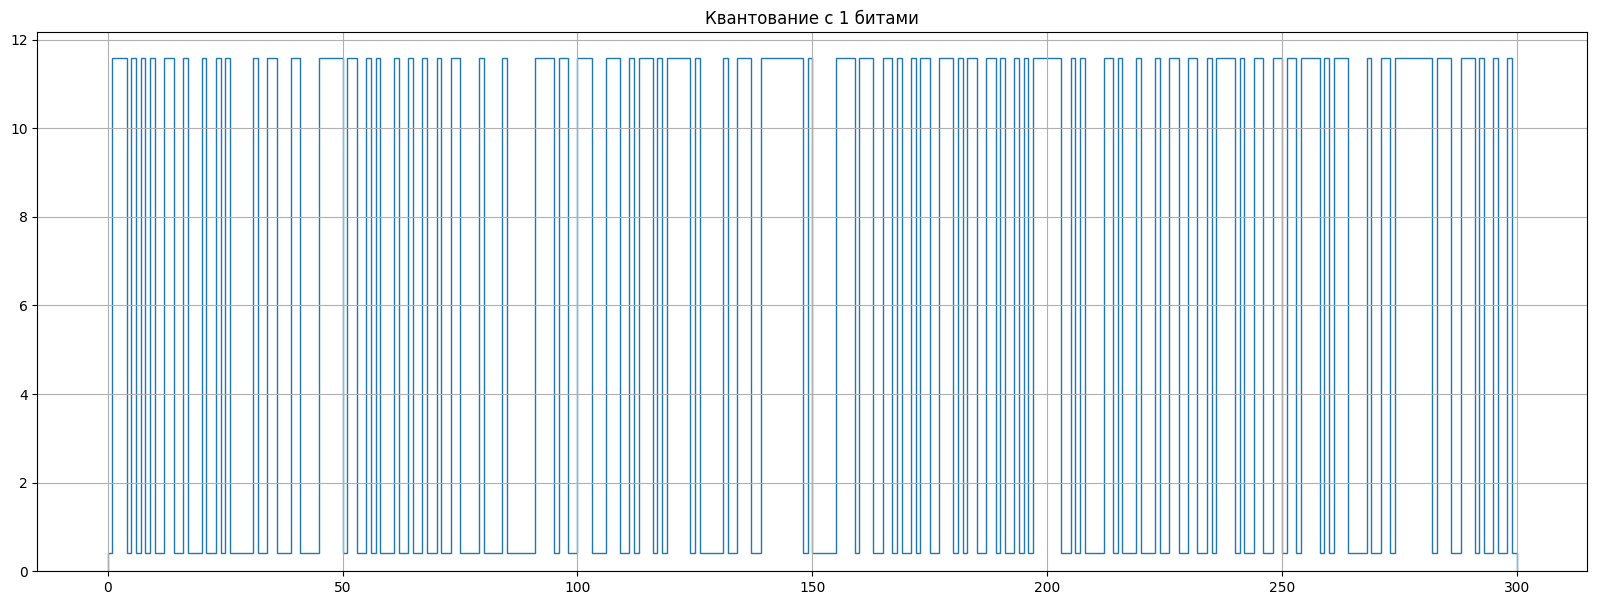

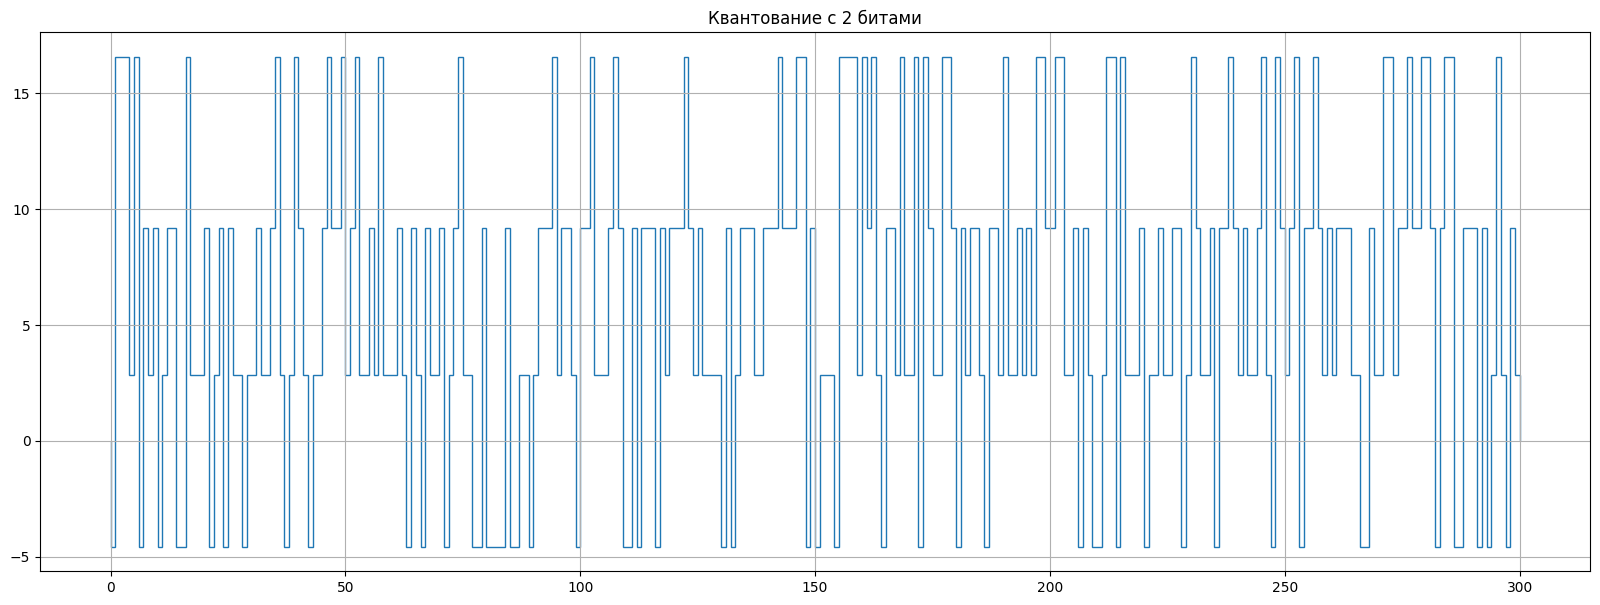

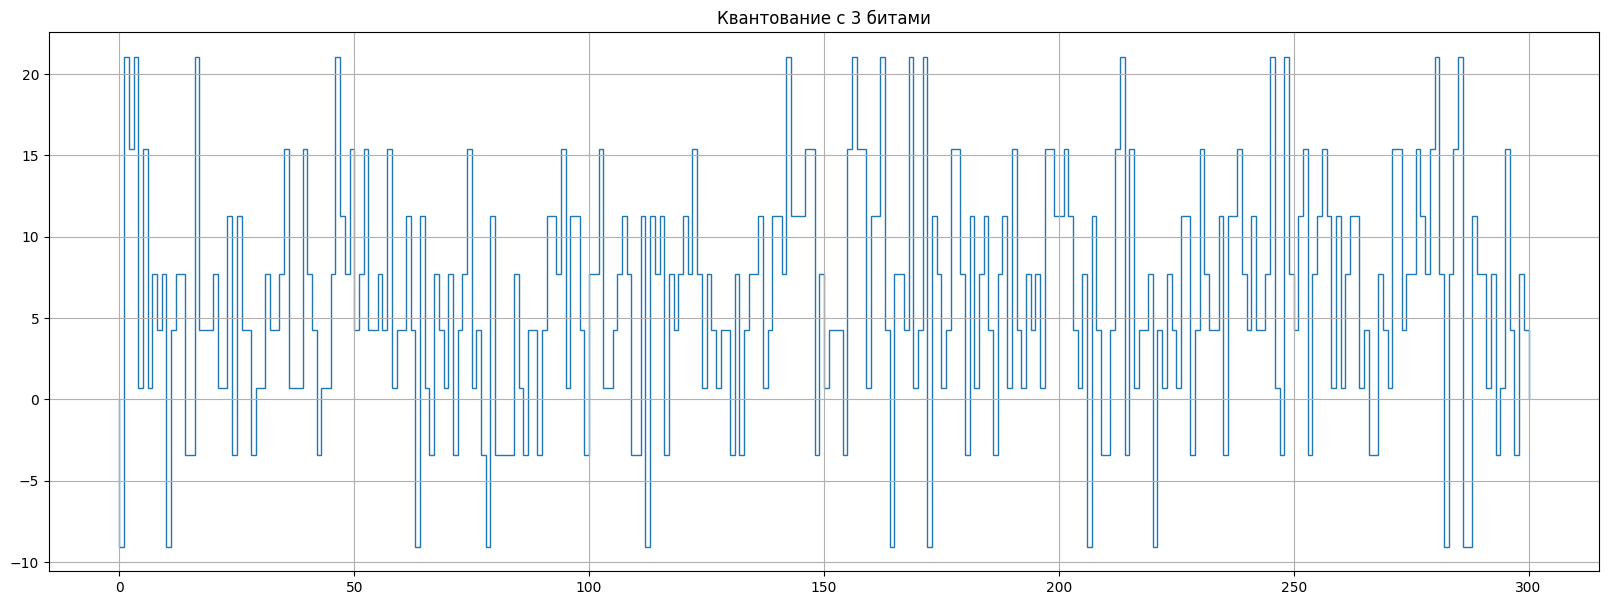

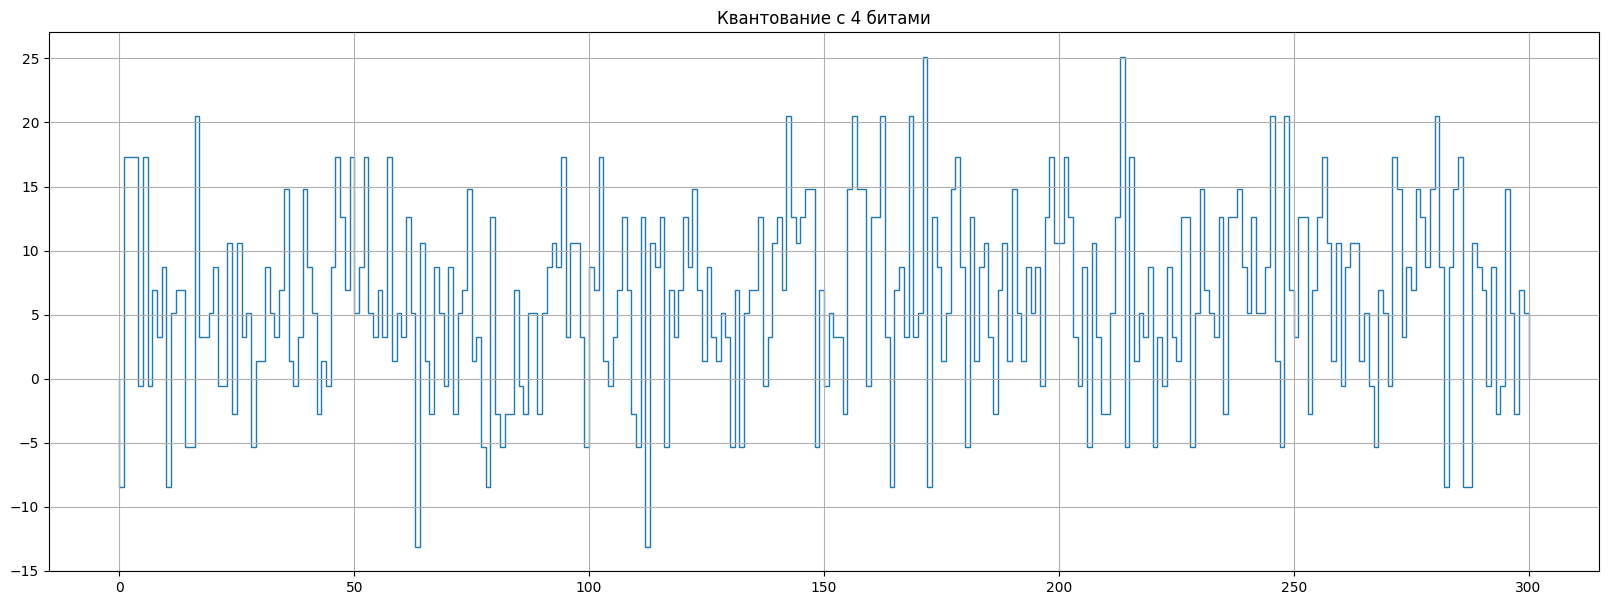

In [ ]:
def lloyd_max(capacity):
    t_list = t[capacity]
    d_list = d[capacity]
    def temp_func(x):
        for i in range(len(t_list)):
            if x < t_list[i]:

                return d_list[i]
        return d_list[-1]
    return np.vectorize(temp_func)

for k in [1, 2, 3, 4]:
    plt.figure(figsize=[20, 7])
    plt.grid()
    plt.title(f"Квантование с {k} битами")
    dfunc = lloyd_max(k)
    results = dfunc(x)
    plt.stairs(results)


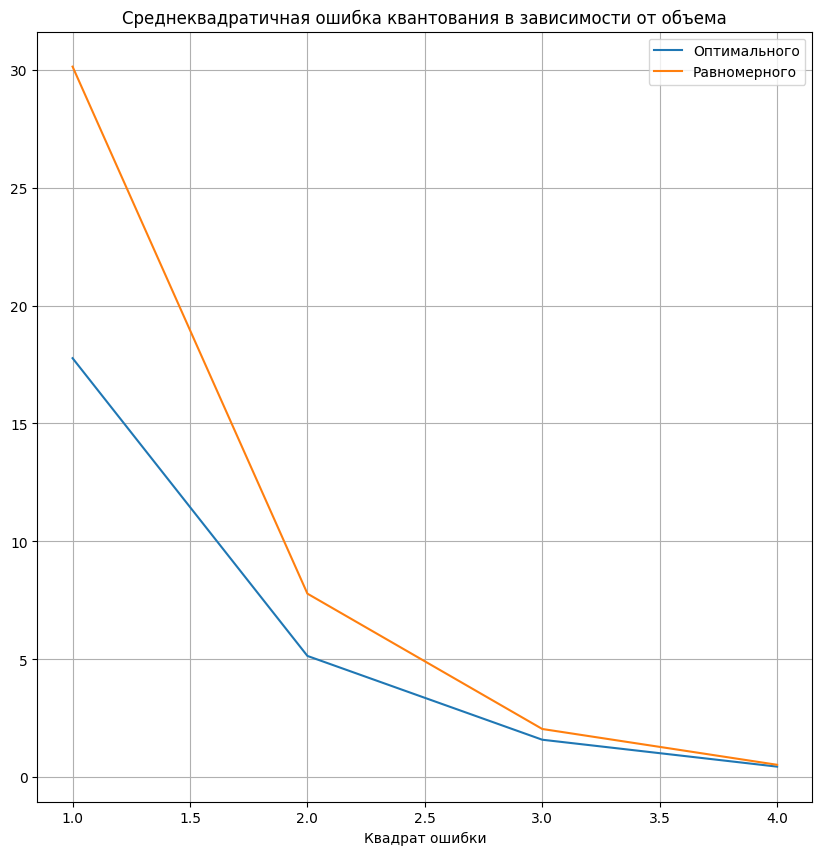

In [ ]:

x_min = np.min(x)
x_max = np.max(x)
errors_optim = []
errors_uniform = []
expected_err = []
args = [1, 2, 3, 4]

for k in args:
    optim = lloyd_max(k)(x)
    uniform = discretizator(x_min,x_max,k)(x)
    errors_optim.append(np.mean((x - optim) **2))
    errors_uniform.append(np.mean((x - uniform) **2))
    t_list = t[k]
    d_list = d[k]
    temp_func = lambda x, d: norm(m, sigma).pdf(x) * (x - d)**2
    err = quad(lambda x: temp_func(x, d_list[0]), -10000, t_list[0])[0]
    err += quad(lambda x: temp_func(x, d_list[-1]), t_list[-1], 10000)[0]
    for i in range(len(t_list) - 1):
        err += quad(lambda x: temp_func(x, d_list[i + 1]), t_list[i], t_list[i+1])[0]
    expected_err.append(err)
plt.figure(figsize=[10, 10])
plt.grid()
plt.title(f"Среднеквадратичная ошибка квантования в зависимости от объема")
plt.xlabel("Объем")
plt.xlabel("Квадрат ошибки")
plt.plot(args, errors_optim, label="Оптимального")
plt.plot(args, errors_uniform, label="Равномерного")

plt.legend()

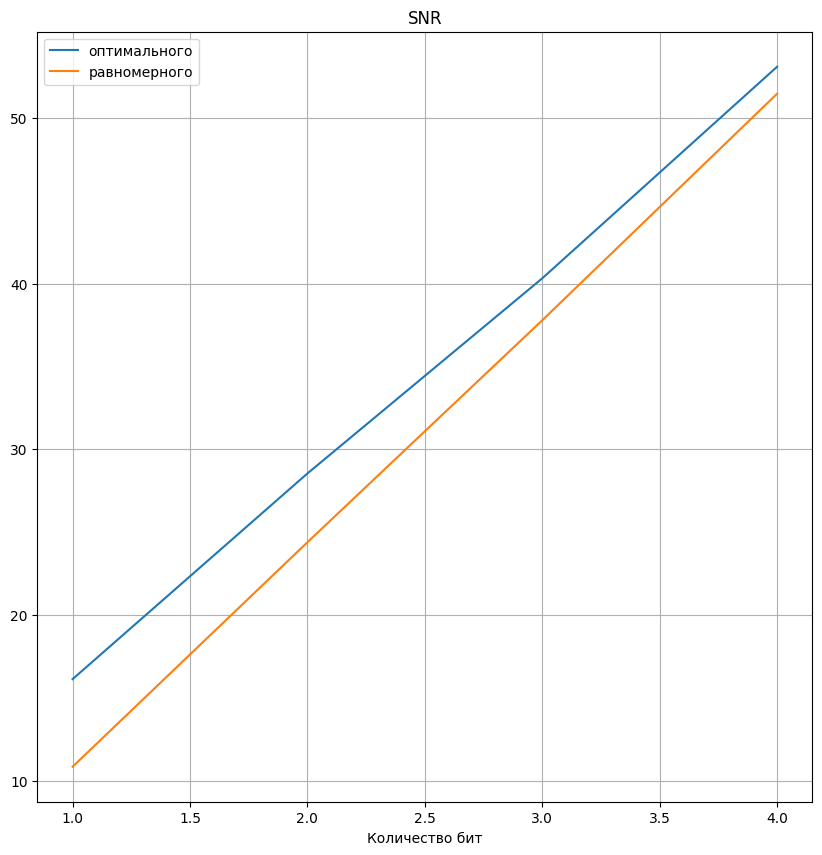

In [ ]:
snr_optim = []
snr_uniform = []
args = [1, 2, 3, 4]
Asig = np.mean(x**2)**0.5
for k in args:
    optim = lloyd_max(k)(x)
    noise = np.mean((x - optim) **2) ** 0.5
    snr_optim.append(20 * np.log(Asig / noise))
    uniform = discretizator(x_min, x_max, k)(x)
    noise = np.mean((x - uniform) **2) ** 0.5
    snr_uniform.append(20 * np.log(Asig / noise))
plt.figure(figsize=[10, 10])
plt.grid()
plt.title("SNR")
plt.xlabel("Количество бит")
plt.plot(args, snr_optim, label="оптимального"); plt.plot(args, snr_uniform, label="равномерного");
plt.legend()